# Training a CNN to classify sequence of vertical head motions

Notebook by Angela Liu

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

Data are saved in csv files and read in pandas dataframes. Perform data analysis on head.y.

In [2]:
speed1 = pandas.read_csv("speed-1.csv",header = None)
speed1 = speed1.rename(columns={0: 'time', 1: 'head.x', 2: 'head.y', 3: 'head.z', 4: 'rhand.x', 5: 'rhand.y', 6: 'rhand.z', 7: 'lhand.x', 8: 'lhand.y', 9: 'lhand.z'})
speed1.head()

,time,head.x,head.y,head.z,rhand.x,rhand.y,rhand.z,lhand.x,lhand.y,lhand.z
0,0.000000,0.053891,1.774360,-0.286880,0.187969,1.041781,-0.035778,-0.135743,0.998981,-0.183376
1,0.013799,0.052847,1.773887,-0.286739,0.187790,1.040555,-0.035749,-0.136958,0.997395,-0.184446
2,0.027315,0.051720,1.773298,-0.286552,0.187884,1.038587,-0.035756,-0.138343,0.995791,-0.185595
3,0.041255,0.050521,1.772581,-0.286323,0.188091,1.036780,-0.036062,-0.139871,0.993907,-0.186985
4,0.055459,0.049238,1.771987,-0.286134,0.188583,1.034516,-0.036853,-0.141603,0.991649,-0.188674


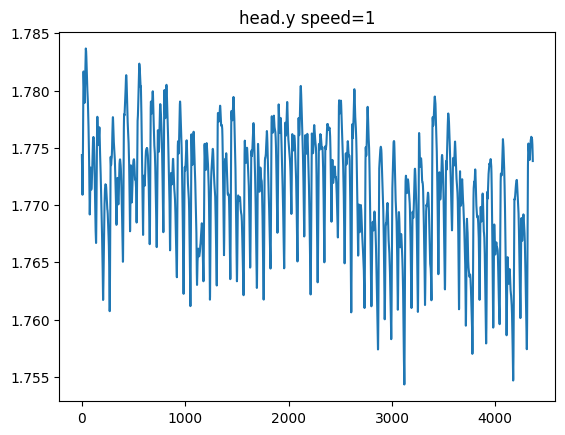

In [3]:
speed1['head.y'].plot.line(title='head.y speed=1');

In [4]:
print(speed1['head.y'].max())
print(speed1['head.y'].min())
print(speed1['head.y'].max()-speed1['head.y'].min())

1.783673
1.754326
0.029347000000000012


In [5]:
speed2 = pandas.read_csv("speed-2.csv",header = None)
speed2 = speed2.rename(columns={0: 'time', 1: 'head.x', 2: 'head.y', 3: 'head.z', 4: 'rhand.x', 5: 'rhand.y', 6: 'rhand.z', 7: 'lhand.x', 8: 'lhand.y', 9: 'lhand.z'})
speed2.head()

,time,head.x,head.y,head.z,rhand.x,rhand.y,rhand.z,lhand.x,lhand.y,lhand.z
0,0.000000,0.070725,1.755666,-0.410135,0.205686,0.953666,-0.238088,-0.163950,0.906241,-0.422857
1,0.013216,0.069355,1.757412,-0.409745,0.210705,0.947599,-0.249874,-0.166674,0.908675,-0.419244
2,0.027356,0.068048,1.759212,-0.409498,0.215238,0.940332,-0.262719,-0.169644,0.911281,-0.415226
3,0.040815,0.066928,1.760902,-0.409506,0.220639,0.936302,-0.274696,-0.172496,0.914003,-0.411099
4,0.054686,0.065890,1.762606,-0.409620,0.225680,0.932226,-0.288731,-0.175397,0.916879,-0.406431


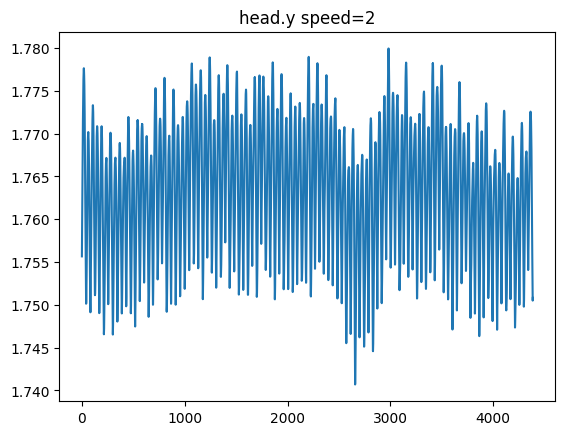

In [6]:
speed2['head.y'].plot.line(title='head.y speed=2');

In [7]:
speed3 = pandas.read_csv("speed-3.csv",header = None)
speed3 = speed3.rename(columns={0: 'time', 1: 'head.x', 2: 'head.y', 3: 'head.z', 4: 'rhand.x', 5: 'rhand.y', 6: 'rhand.z', 7: 'lhand.x', 8: 'lhand.y', 9: 'lhand.z'})
speed3.head()

,time,head.x,head.y,head.z,rhand.x,rhand.y,rhand.z,lhand.x,lhand.y,lhand.z
0,0.000000,0.015198,1.744125,-0.299430,0.153963,0.989932,-0.064813,-0.281544,0.924420,-0.485411
1,0.013577,0.014482,1.745771,-0.298382,0.156614,0.985168,-0.071825,-0.281333,0.924919,-0.477945
2,0.027617,0.013962,1.748131,-0.297503,0.159324,0.980502,-0.080279,-0.280810,0.926203,-0.468884
3,0.041437,0.013469,1.750827,-0.296511,0.162644,0.976144,-0.089990,-0.279975,0.928046,-0.458610
4,0.055125,0.013064,1.753760,-0.295571,0.166090,0.971685,-0.101131,-0.278864,0.930387,-0.447614


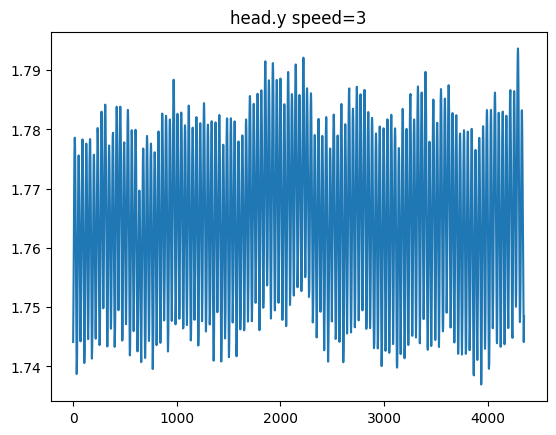

In [8]:
speed3['head.y'].plot.line(title='head.y speed=3');

In [9]:
speed4 = pandas.read_csv("speed-4.csv",header = None)
speed4 = speed4.rename(columns={0: 'time', 1: 'head.x', 2: 'head.y', 3: 'head.z', 4: 'rhand.x', 5: 'rhand.y', 6: 'rhand.z', 7: 'lhand.x', 8: 'lhand.y', 9: 'lhand.z'})
speed4.head()

,time,head.x,head.y,head.z,rhand.x,rhand.y,rhand.z,lhand.x,lhand.y,lhand.z
0,0.000000,0.024750,1.788505,-0.216517,0.216825,0.929324,-0.208326,-0.234223,0.963484,-0.219820
1,0.013934,0.025417,1.787767,-0.217550,0.222058,0.922365,-0.227446,-0.229003,0.970373,-0.202693
2,0.027370,0.026000,1.786302,-0.218525,0.227167,0.917107,-0.246948,-0.223734,0.977017,-0.185913
3,0.041454,0.026464,1.784139,-0.219347,0.232390,0.911641,-0.266262,-0.218709,0.983157,-0.169944
4,0.055400,0.026929,1.781409,-0.219973,0.237385,0.906368,-0.284862,-0.213481,0.988948,-0.154899


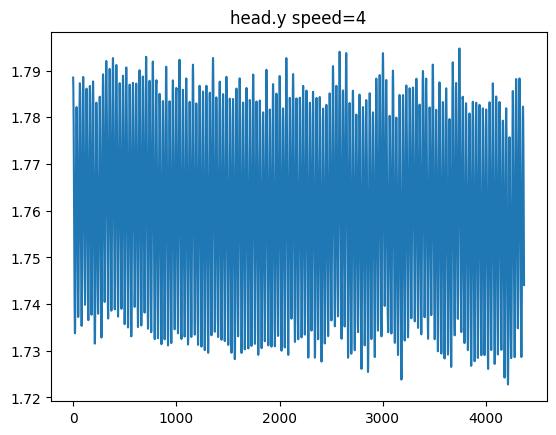

In [10]:
speed4['head.y'].plot.line(title='head.y speed=4');

In [11]:
print(speed4['head.y'].max())
print(speed4['head.y'].min())
print(speed4['head.y'].max()-speed4['head.y'].min())

1.794747
1.722779
0.07196800000000003


### Convoluted Neural Networks

Prepare data, build model, and begin training.

Referenced tutorial: https://medium.com/analytics-vidhya/time-series-classification-with-convolutions-ed5cb33b1e3b

In [12]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch import optim
import torch.nn.functional as F

In [13]:
def fill(combination,table,speed,win=100,col="head.y"):
    for j in range(len(table)-win):
        window = {'speed':speed}
        for i in range(win):
            window[i]=table[col].iloc[i+j]
        combination+=[window]

In [14]:
combination = []
fill(combination,speed1,1)
fill(combination,speed2,2)
fill(combination,speed3,3)
fill(combination,speed4,4)

In [15]:
df = pd.DataFrame(combination)
df.head()

,speed,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,1.774360,1.773887,1.773298,1.772581,1.771987,1.771294,1.770897,1.771206,1.772037,...,1.771395,1.771346,1.771421,1.771533,1.771687,1.771899,1.772112,1.772278,1.772511,1.772734
1,1,1.773887,1.773298,1.772581,1.771987,1.771294,1.770897,1.771206,1.772037,1.773128,...,1.771346,1.771421,1.771533,1.771687,1.771899,1.772112,1.772278,1.772511,1.772734,1.773097
2,1,1.773298,1.772581,1.771987,1.771294,1.770897,1.771206,1.772037,1.773128,1.774552,...,1.771421,1.771533,1.771687,1.771899,1.772112,1.772278,1.772511,1.772734,1.773097,1.773467
3,1,1.772581,1.771987,1.771294,1.770897,1.771206,1.772037,1.773128,1.774552,1.776076,...,1.771533,1.771687,1.771899,1.772112,1.772278,1.772511,1.772734,1.773097,1.773467,1.773878
4,1,1.771987,1.771294,1.770897,1.771206,1.772037,1.773128,1.774552,1.776076,1.777729,...,1.771687,1.771899,1.772112,1.772278,1.772511,1.772734,1.773097,1.773467,1.773878,1.774297


In [16]:
df = df.sample(frac = 1)
df.head()

,speed,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
11682,3,1.748380,1.751651,1.755228,1.758872,1.762519,1.765863,1.768924,1.771479,1.773516,...,1.776066,1.773895,1.771345,1.768482,1.765323,1.761980,1.758651,1.755593,1.752858,1.750581
4875,2,1.758663,1.759254,1.759802,1.760480,1.761307,1.762091,1.762958,1.763913,1.764761,...,1.762766,1.764275,1.765578,1.766792,1.768101,1.769292,1.770331,1.771348,1.772315,1.773114
8334,2,1.762312,1.761311,1.760258,1.759066,1.757925,1.756783,1.755568,1.754283,1.752954,...,1.759061,1.758092,1.757052,1.755902,1.754702,1.753431,1.752074,1.750824,1.750665,1.751636
10697,3,1.790661,1.790960,1.790839,1.790258,1.789249,1.787712,1.785672,1.783166,1.780272,...,1.759212,1.757507,1.755857,1.755051,1.755170,1.755579,1.756250,1.757815,1.759927,1.762385
8714,3,1.778104,1.778124,1.776531,1.775064,1.773257,1.771070,1.768556,1.765717,1.762589,...,1.744080,1.743609,1.744102,1.744218,1.744862,1.746442,1.748451,1.750898,1.753930,1.757324


In [17]:
split_percentage=.8
train_size = int(len(df) * split_percentage)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

x_train = df_train.iloc[:, 1:].values.reshape(-1, 1, 100)
x_test = df_test.iloc[:, 1:].values.reshape(-1, 1, 100)
y_train = df_train.iloc[:, 0].values-1
y_test = df_test.iloc[:, 0].values-1

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13657, 1, 100), (3415, 1, 100), (13657,), (3415,))

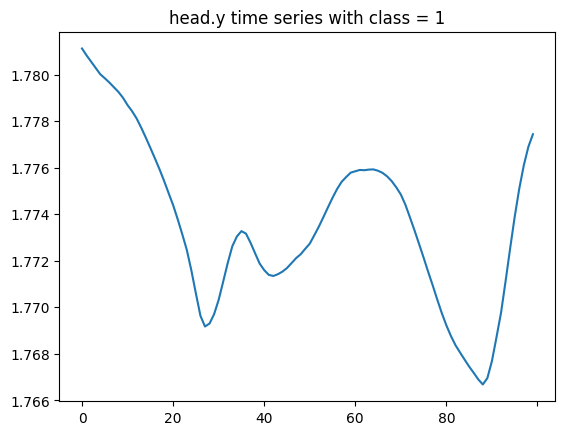

In [64]:
df_train.iloc[9, 1:].plot.line(title=f'head.y time series with class = {df_train.iloc[9, 0]}');

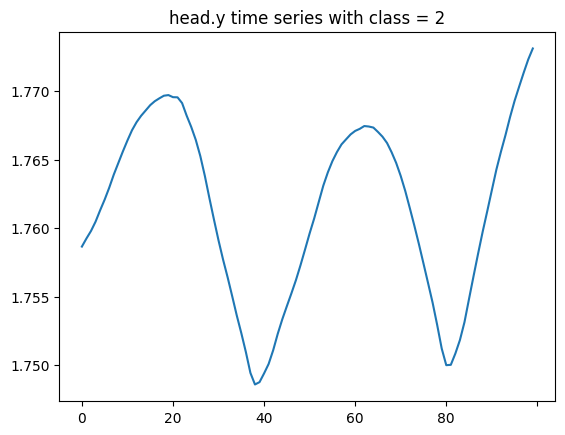

In [20]:
df_train.iloc[1, 1:].plot.line(title=f'head.y time series with class = {df_train.iloc[1, 0]}');

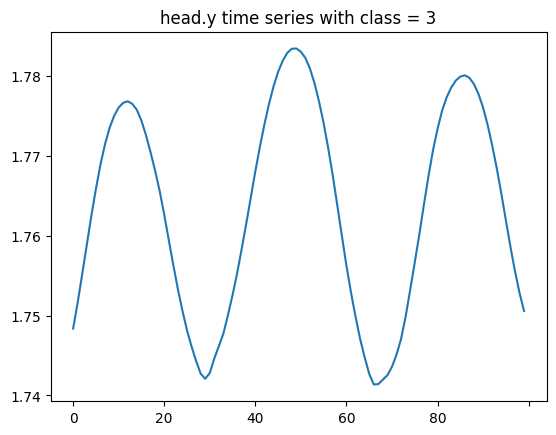

In [58]:
df_train.iloc[0, 1:].plot.line(title=f'head.y time series with class = {df_train.iloc[0, 0]}');

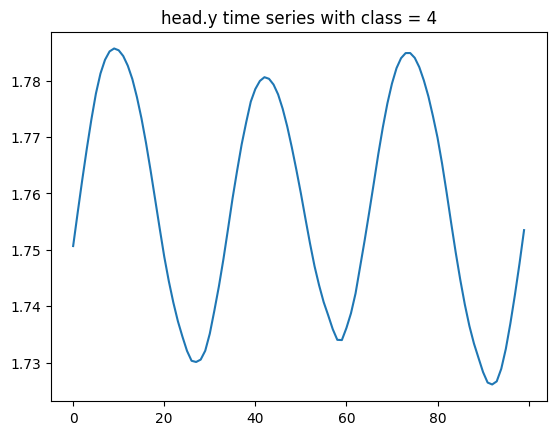

In [57]:
df_train.iloc[5, 1:].plot.line(title=f'head.y time series with class = {df_train.iloc[5, 0]}');

In [21]:
def create_datasets(train, test, train_target, test_target, valid_pct=0.1, seed=None):
    """Converts NumPy arrays into PyTorch datsets."""
    
    train, test, train_target, test_target = train, test, train_target, test_target
    assert len(train)==len(train_target)
    idx = np.arange(len(train))
    trn_idx, val_idx = train_test_split(
        idx, test_size=valid_pct, random_state=seed)
    trn_ds = TensorDataset(
        torch.tensor(train[trn_idx]).float(), 
        torch.tensor(train_target[trn_idx]).long())
    val_ds = TensorDataset(
        torch.tensor(train[val_idx]).float(), 
        torch.tensor(train_target[val_idx]).long())
    tst_ds = TensorDataset(
        torch.tensor(test).float(),  
        torch.tensor(test_target).long())
    return trn_ds, val_ds, tst_ds

In [22]:
def create_loaders(data, bs=128, jobs=0):
    """Wraps the datasets returned by create_datasets function with data loaders."""
    
    trn_ds, val_ds, tst_ds = data
    trn_dl = DataLoader(trn_ds, batch_size=bs, shuffle=True, num_workers=jobs)
    val_dl = DataLoader(val_ds, batch_size=bs, shuffle=False, num_workers=jobs)
    tst_dl = DataLoader(tst_ds, batch_size=bs, shuffle=False, num_workers=jobs)
    return trn_dl, val_dl, tst_dl

In [23]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [24]:
# Normalize x_train
x_train=normalize(x_train)
# Normalize x_test
x_test=normalize(x_test)

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
datasets = create_datasets(x_train, x_test, y_train, y_test, seed=1234)
trn_dl, val_dl, tst_dl = create_loaders(datasets, bs=100)

In [26]:
class CostumConv1d(nn.Module):
    """Implementes a 1-d convolution with 'batteries included'.
    
    The module adds (optionally) activation function and dropout layers right after
    a separable convolution layer.
    """
    def __init__(self, ni, no, kernel, stride, pad, drop=None,
                 activ=lambda: nn.ReLU(inplace=True)):
    
        super().__init__()
        assert drop is None or (0.0 < drop < 1.0)
        layers = [nn.Conv1d(ni, no, kernel, stride, pad)]
        if activ:
            layers.append(activ())
        if drop is not None:
            layers.append(nn.Dropout(drop))
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x): 
        return self.layers(x)
      
class Flatten(nn.Module):
    """Converts N-dimensional tensor into 'flat' one."""

    def __init__(self, keep_batch_dim=True):
        super().__init__()
        self.keep_batch_dim = keep_batch_dim

    def forward(self, x):
        if self.keep_batch_dim:
            return x.view(x.size(0), -1)
        return x.view(-1)

In [27]:
for epoch in range(1):
    epoch_loss = 0
    for i, batch in enumerate(trn_dl):
        x_raw, y_batch = [t.to(device) for t in batch]
x_raw.shape

torch.Size([91, 1, 100])

In [28]:
class Classifier(nn.Module):
    def __init__(self, raw_ni, no, drop=.5):
        super().__init__()
        
        self.raw = nn.Sequential(
            CostumConv1d(    raw_ni,  128, 99, 1, 0, drop=drop),
            nn.MaxPool1d(2, stride=2),
            Flatten(),
            nn.Dropout(drop), nn.Linear(128, 64), nn.ReLU(inplace=True),
            nn.Dropout(drop), nn.Linear( 64, 64), nn.ReLU(inplace=True))
        
        self.out = nn.Sequential(
            nn.Linear(64, 64), nn.ReLU(inplace=True), nn.Linear(64, no))
        
    def forward(self, t_raw):
        raw_out = self.raw(t_raw)
        out = self.out(raw_out)
        return out

In [29]:
raw_feat = x_train.shape[1]

lr = 0.001
n_epochs = 500
iterations_per_epoch = len(trn_dl)
num_classes = 4
best_acc = 0
patience, trials = 200, 0
base = 1
step = 2
loss_history = []
acc_history = []
trn_sz = len(df_train)

model = Classifier(raw_feat, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=lr)

print('Start model training')

for epoch in range(1, n_epochs + 1):
    
    model.train()
    epoch_loss = 0
    for i, batch in enumerate(trn_dl):
        x_raw, y_batch = [t.to(device) for t in batch]
        opt.zero_grad()
        out = model(x_raw)
        loss = criterion(out, y_batch)
        epoch_loss += loss.item()
        loss.backward()
        opt.step()
        
    epoch_loss /= trn_sz
    loss_history.append(epoch_loss)
    
    model.eval()
    correct, total = 0, 0
    for batch in val_dl:
        x_raw, y_batch = [t.to(device) for t in batch]
        out = model(x_raw)
        preds = F.log_softmax(out, dim=1).argmax(dim=1)
        total += y_batch.size(0)
        correct += (preds == y_batch).sum().item()
    
    acc = correct / total
    acc_history.append(acc)

    if epoch % base == 0:
        print(f'Epoch: {epoch:3d}. Loss: {epoch_loss:.4f}. Acc.: {acc:2.2%}')
        base *= step

    if acc > best_acc:
        trials = 0
        best_acc = acc
        torch.save(model.state_dict(), 'best.pth')
        print(f'Epoch {epoch} best model saved with accuracy: {best_acc:2.2%}')
    else:
        trials += 1
        if trials >= patience:
            print(f'Early stopping on epoch {epoch}')
            break
            
print('Done!')

Start model training
Epoch:   1. Loss: 0.0053. Acc.: 99.27%
Epoch 1 best model saved with accuracy: 99.27%
Epoch:   2. Loss: 0.0010. Acc.: 99.71%
Epoch 2 best model saved with accuracy: 99.71%
Epoch 3 best model saved with accuracy: 100.00%
Epoch:   4. Loss: 0.0004. Acc.: 100.00%
Epoch:   8. Loss: 0.0002. Acc.: 100.00%
Epoch:  16. Loss: 0.0002. Acc.: 100.00%
Epoch:  32. Loss: 0.0001. Acc.: 100.00%
Epoch:  64. Loss: 0.0001. Acc.: 100.00%
Epoch: 128. Loss: 0.0000. Acc.: 100.00%
Early stopping on epoch 203
Done!


In [30]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

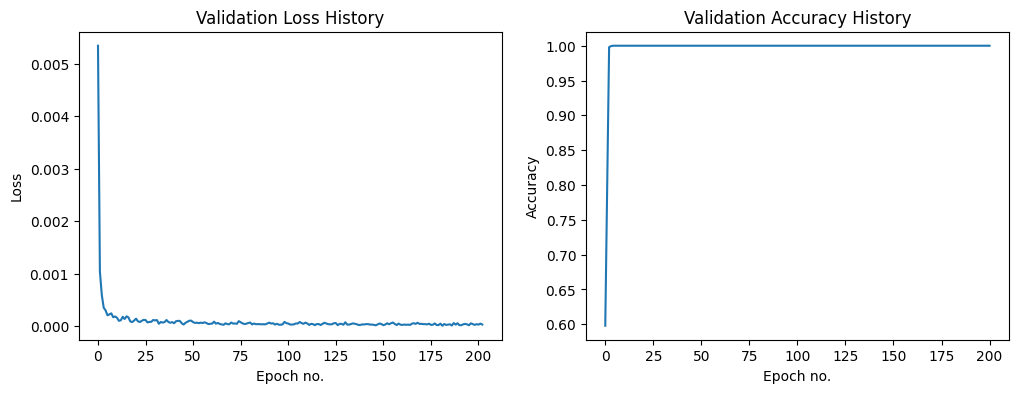

In [31]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(loss_history, label='loss')
ax[0].set_title('Validation Loss History')
ax[0].set_xlabel('Epoch no.')
ax[0].set_ylabel('Loss')

ax[1].plot(smooth(acc_history, 5)[:-2], label='acc')
ax[1].set_title('Validation Accuracy History')
ax[1].set_xlabel('Epoch no.')
ax[1].set_ylabel('Accuracy');

In [32]:
preds_array = np.array([])
for batch in tst_dl:
        x_raw, y_batch = [t.to(device) for t in batch]
        out = model(x_raw)
        preds = F.log_softmax(out, dim=1).argmax(dim=1).numpy()
        preds_array = np.concatenate((preds_array, preds), axis=None)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds_array)

array([[820,   0,   0,   0],
       [  0, 914,   0,   0],
       [  0,   0, 838,   0],
       [  0,   0,   0, 843]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2','class 3', 'class 4']
print(classification_report(y_test, preds_array, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       820
     class 2       1.00      1.00      1.00       914
     class 3       1.00      1.00      1.00       838
     class 4       1.00      1.00      1.00       843

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415



Save model

In [35]:
# torch.save(model.state_dict(), 'heady_model1')

Load model with re-evaluation

In [36]:
raw_feat = 1 # x_train.shape[1]
num_classes = 4
saved_model = Classifier(raw_feat, num_classes)
saved_model.load_state_dict(torch.load('heady_model1'))
saved_model.eval()

Classifier(
  (raw): Sequential(
    (0): CostumConv1d(
      (layers): Sequential(
        (0): Conv1d(1, 128, kernel_size=(99,), stride=(1,))
        (1): ReLU(inplace=True)
        (2): Dropout(p=0.5, inplace=False)
      )
    )
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Flatten()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=64, out_features=64, bias=True)
    (8): ReLU(inplace=True)
  )
  (out): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=4, bias=True)
  )
)

In [37]:
preds_array2 = np.array([])
for batch in tst_dl:
        x_raw, y_batch = [t.to(device) for t in batch]
        out = saved_model(x_raw)
        preds = F.log_softmax(out, dim=1).argmax(dim=1).numpy()
        preds_array2 = np.concatenate((preds_array2, preds), axis=None)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test, preds_array2)

array([[820,   0,   0,   0],
       [  0, 914,   0,   0],
       [  0,   0, 838,   0],
       [  0,   0,   0, 843]], dtype=int64)

In [40]:
print(classification_report(y_test, preds_array2, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00       820
     class 2       1.00      1.00      1.00       914
     class 3       1.00      1.00      1.00       838
     class 4       1.00      1.00      1.00       843

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415



### Prepare model for running in Unity

Referenced tutorial: https://medium.com/@a.abelhopereira/how-to-use-pytorch-models-in-unity-aa1e964d3374

In [41]:
df.iloc[0]

speed    3.000000
0        1.748380
1        1.751651
2        1.755228
3        1.758872
           ...   
95       1.761980
96       1.758651
97       1.755593
98       1.752858
99       1.750581
Name: 11682, Length: 101, dtype: float64

In [42]:
raw_data=df.iloc[0, 1:].values
normalized_input=normalize(raw_data)
normalized_input=torch.from_numpy(normalized_input).to(torch.float32)
formatted=normalized_input.unsqueeze(0).unsqueeze(0)
out = saved_model(formatted)
preds = F.log_softmax(out, dim=1).argmax(dim=1).numpy()
preds

array([2], dtype=int64)

In [43]:
def test(idx):
    raw_data=df.iloc[idx, 1:].values
    normalized_input=normalize(raw_data)
    normalized_input=torch.from_numpy(normalized_input).to(torch.float32)
    formatted=normalized_input.unsqueeze(0).unsqueeze(0)
    out = saved_model(formatted)
    preds = F.log_softmax(out, dim=1).argmax(dim=1).numpy()+1
    print(df.iloc[idx]['speed'],preds,out)

In [44]:
for i in range(10):
    test(i)

3.0 [3] tensor([[-11.2412,  -4.7965,   9.5935,  -4.3456]], grad_fn=<AddmmBackward0>)
2.0 [2] tensor([[-15.8537,   8.4505,  -7.6032, -11.0567]], grad_fn=<AddmmBackward0>)
2.0 [2] tensor([[-16.3012,   8.3551,  -7.8229, -10.9522]], grad_fn=<AddmmBackward0>)
3.0 [3] tensor([[-11.0916,  -4.4425,   9.3511,  -4.3603]], grad_fn=<AddmmBackward0>)
3.0 [3] tensor([[-10.4349,  -4.7110,   9.2075,  -4.3182]], grad_fn=<AddmmBackward0>)
4.0 [4] tensor([[-17.0960, -18.5469,  -0.7595,   9.5315]], grad_fn=<AddmmBackward0>)
3.0 [3] tensor([[-10.7040,  -4.9315,   9.4344,  -4.3615]], grad_fn=<AddmmBackward0>)
4.0 [4] tensor([[-17.1550, -23.5802,  -0.9678,  10.5435]], grad_fn=<AddmmBackward0>)
2.0 [2] tensor([[-20.2130,   9.5959, -10.0366, -12.7312]], grad_fn=<AddmmBackward0>)
1.0 [1] tensor([[ 2.6654, -3.6491,  1.6435, -6.2595]], grad_fn=<AddmmBackward0>)


In [45]:
raw_data=np.zeros(100)
raw_data[0]=1
normalized_input=normalize(raw_data)
normalized_input=torch.from_numpy(normalized_input).to(torch.float32)
formatted=normalized_input.unsqueeze(0).unsqueeze(0)
out = saved_model(formatted)
preds = F.log_softmax(out, dim=1).argmax(dim=1).numpy()+1
preds

array([1], dtype=int64)

In [46]:
raw_data=df.iloc[0, 1:].values
normalized_input=normalize(raw_data)
normalized_input=torch.from_numpy(normalized_input).to(torch.float32)
formatted=normalized_input.unsqueeze(0).unsqueeze(0)
formatted.shape

torch.Size([1, 1, 100])

Save pytorch model as onnx file

In [47]:
# torch.onnx.export(saved_model,                              
#                   formatted,                       
#                   "testing.onnx",                  
#                   export_params=True,                
#                   opset_version=9,                   
#                   do_constant_folding=True,          
#                   input_names = ['x'],               
#                   output_names = ['y']               
#                   )

Testing onnx model

In [48]:
raw = np.zeros(100)
raw[0]=1
raw = raw.reshape(1,1,100).astype(np.float32)
raw.shape

(1, 1, 100)

In [49]:
import onnx
import onnxruntime as ort
import numpy as np

# Load the ONNX model
model_path = 'testing.onnx'

# Create an inference session
session = ort.InferenceSession(model_path)

# Prepare your input data
# Assuming your input is a NumPy array with the shape [1, 1, 100]
for i in range(10):
    raw = df.iloc[i, 1:].values
    raw=normalize(raw)
    raw = raw.reshape(1,1,100).astype(np.float32)
    raw.shape
    input_data = raw

    # Get the name of the input node
    input_name = session.get_inputs()[0].name

    # Run the model
    output = session.run(None, {input_name: input_data})

    # Output is a list of outputs, you can get the first output by indexing
    output_data = output[0]
    preds = np.argmax(output_data)+1
    print("Predicted speed:",preds,"Actual speed:",df.iloc[i]['speed'],"Output data:", output_data)


Predicted speed: 3 Actual speed: 3.0 Output data: [[-11.241204   -4.796452    9.593544   -4.3455753]]
Predicted speed: 2 Actual speed: 2.0 Output data: [[-15.853722    8.450497   -7.6032195 -11.05667  ]]
Predicted speed: 2 Actual speed: 2.0 Output data: [[-16.30116     8.355102   -7.8229127 -10.952223 ]]
Predicted speed: 3 Actual speed: 3.0 Output data: [[-11.091571  -4.442474   9.351095  -4.360276]]
Predicted speed: 3 Actual speed: 3.0 Output data: [[-10.434887   -4.7110224   9.207491   -4.3181696]]
Predicted speed: 4 Actual speed: 4.0 Output data: [[-17.095985   -18.546928    -0.75954676   9.531492  ]]
Predicted speed: 3 Actual speed: 3.0 Output data: [[-10.7040205  -4.9314713   9.43441    -4.3615146]]
Predicted speed: 4 Actual speed: 4.0 Output data: [[-17.154957  -23.580215   -0.9678167  10.543488 ]]
Predicted speed: 2 Actual speed: 2.0 Output data: [[-20.213001   9.595945 -10.036555 -12.731231]]
Predicted speed: 1 Actual speed: 1.0 Output data: [[ 2.6653886 -3.6491127  1.6435425 -